In [21]:

from src.Unet import Unet
from src.loss import jaccard_loss
from src.metrics import IOU
from src.consts import EPOCHS, STEPS, SEED, RGB_DIR, JPG_IMAGES, MASK_DIR, FC_DIR
from src.helpers import create_folder
from src.generators import create_generators
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf 

In [2]:
model = Unet(num_classes=1).build_model()

compile_params ={
    'loss':jaccard_loss(smooth=90), 
    'optimizer':'rmsprop',
    'metrics':[IOU]
    }
                
model.compile(**compile_params)

model_name = "models/unet.h5"
modelcheckpoint = ModelCheckpoint(model_name,
                                monitor='val_loss',
                                mode='auto',
                                verbose=1,
                                save_best_only=True)

In [3]:
train_gen = create_generators('training', SEED)
val_gen = create_generators('validation', SEED)

Found 9399 images belonging to 1 classes.
Found 9399 images belonging to 1 classes.
Found 2349 images belonging to 1 classes.
Found 2349 images belonging to 1 classes.


In [4]:
history = model.fit_generator(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS,
                    steps_per_epoch=STEPS,
                    validation_steps = STEPS,
                    shuffle=True,
)

C:\Users\masob\AppData\Local\Temp\ipykernel_15244\933514074.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/5
10/10 [==============================] - 1080s 109s/step - loss: 1.0869 - IOU: 0.6101 - val_loss: 1.1605 - val_IOU: 0.6003
Epoch 2/5
10/10 [==============================] - 1066s 109s/step - loss: 1.1465 - IOU: 0.6051 - val_loss: 1.1744 - val_IOU: 0.5955
Epoch 3/5
10/10 [==============================] - 1082s 109s/step - loss: 1.1440 - IOU: 0.6060 - val_loss: 1.0622 - val_IOU: 0.6341
Epoch 4/5
10/10 [==============================] - 1060s 108s/step - loss: 1.1511 - IOU: 0.6035 - val_loss: 1.3288 - val_IOU: 0.5423
Epoch 5/5
10/10 [==============================] - 1062s 108s/step - loss: 1.1654 - IOU: 0.5986 - val_loss: 1.1816 - val_IOU: 0.5930


In [5]:
create_folder('models', '.')
model.save(filepath=model_name)

dict_keys(['loss', 'IOU', 'val_loss', 'val_IOU'])


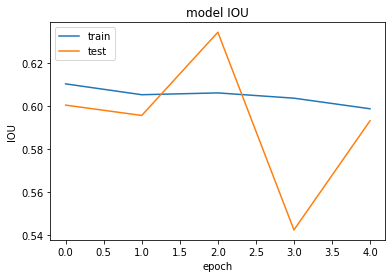

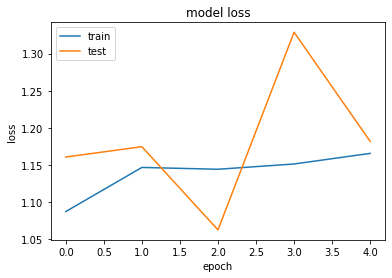

In [9]:
# summarize history for accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['IOU'])
plt.plot(history.history['val_IOU'])
plt.title('model IOU')
plt.ylabel('IOU')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

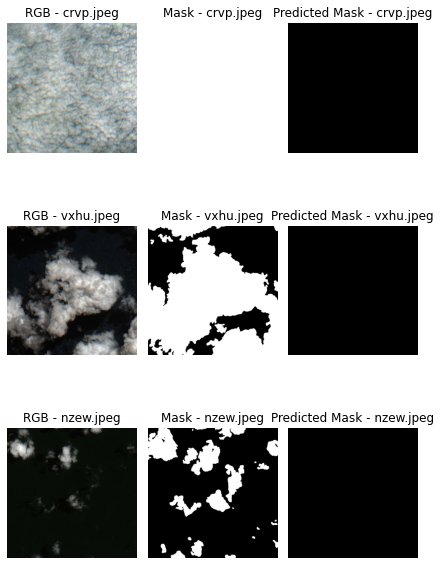

In [71]:
from src.utils import plot_predictions_grid
import os, random
img_names = [random.choice(os.listdir('./images/rgb/img')) for _ in range(3)]
loaded_model = tf.keras.models.load_model("./" + model_name, compile=False)
plot_predictions_grid(img_names, loaded_model)